## MERRA2 Aerosol Hourly Granularity
- Download
- Trim
- Create Cutout
- Generate Wind Outputs

# 1. Imports and Download

In [1]:
import geodata
import xarray as xr
import logging
import matplotlib.pyplot as plt
logging.basicConfig(level=logging.INFO)

In [2]:
DS = geodata.Dataset(module="merra2",
					 years=slice(2015, 2015),
					 months=slice(2,2),
                     weather_data_config = "surface_aerosol_hourly")  

INFO:geodata.dataset:Directory /Users/williamhonaker/Desktop/davidson/data_for_geodata/merra2 found, checking for completeness.
INFO:geodata.dataset:Directory complete.


In [3]:
## Verify Dataset
DS.__dict__

{'module': 'merra2',
 'config': 'surface_aerosol_hourly',
 'dataset_module': <module 'geodata.datasets.merra2' from '/usr/local/lib/python3.7/site-packages/geodata-0.0.1-py3.7.egg/geodata/datasets/merra2.py'>,
 'weatherconfig': {'file_granularity': 'daily',
  'tasks_func': <function geodata.datasets.merra2.tasks_daily_merra2(xs, ys, yearmonths, prepare_func, **meta_attrs)>,
  'meta_prepare_func': <function geodata.datasets.merra2.prepare_meta_merra2(xs, ys, year, month, template, module, **params)>,
  'prepare_func': <function geodata.datasets.merra2.prepare_month_aerosol(fn, year, month, xs, ys)>,
  'template': '/Users/williamhonaker/Desktop/davidson/data_for_geodata/merra2/{year}/{month:0>2}/MERRA2_*.tavg1_2d_aer_Nx.*.nc4',
  'url': 'https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2/M2T1NXAER.5.12.4/{year}/{month:0>2}/MERRA2_{spinup}.tavg1_2d_aer_Nx.{year}{month:0>2}{day:0>2}.nc4',
  'fn': '/Users/williamhonaker/Desktop/davidson/data_for_geodata/merra2/{year}/{month:0>2}/MERRA2_{s

In [3]:
if DS.prepared == False:
	DS.get_data()

## 2. Trim

In [4]:
## Variables before trimming
ds = xr.open_dataset(DS.downloadedFiles[0][1])
list(ds.data_vars)

['bcsmass', 'dusmass25', 'ocsmass', 'so4smass', 'sssmass25']

In [5]:
DS.trim_variables()

In [6]:
## Variables after trimming
ds = xr.open_dataset(DS.downloadedFiles[0][1])
list(ds.data_vars)

['bcsmass', 'dusmass25', 'ocsmass', 'so4smass', 'sssmass25']

# 3. Create Cutout

In [12]:
cutout = geodata.Cutout(name="beijing-2015-pm25-test-5",
                        module="merra2",
                        weather_data_config="surface_aerosol_hourly",
                        xs=slice(116, 117),
                        ys=slice(39.5, 40.5),
                        years=slice(2015, 2015),
                        months=slice(2,2))


INFO:geodata.cutout:Cutout (beijing-2015-pm25-test-5, /Users/williamhonaker/Desktop/davidson/data_for_geodata/cutouts) not found or incomplete.


In [14]:
cutout.prepare()

INFO:geodata.preparation:The cutout is already prepared. If you want to recalculate it, supply an `overwrite=True` argument.


True

In [4]:
## Verify Cutout Coords
cutout.coords

Coordinates:
  * y           (y) float64 39.5 40.0 40.5
  * time        (time) datetime64[ns] 2015-02-01T00:30:00 ... 2015-02-13T23:30:00
  * x           (x) float64 116.2 116.9
    lon         (x) float64 ...
    lat         (y) float64 ...
  * year-month  (year-month) MultiIndex
  - year        (year-month) int64 2015
  - month       (year-month) int64 2

# 4. Generate Outputs

In [75]:
ds_pm25 = geodata.convert.pm25(cutout)
df_pm25 = ds_pm25.to_dataframe(name='pm25')
df_pm25.reset_index(inplace=True)
df_pm25

,time,y,x,lat,lon,pm25
0,2015-02-01 00:30:00,39.5,116.250,39.5,116.250,56.539371
1,2015-02-01 00:30:00,39.5,116.875,39.5,116.875,85.023460
2,2015-02-01 00:30:00,40.0,116.250,40.0,116.250,28.195593
3,2015-02-01 00:30:00,40.0,116.875,40.0,116.875,25.313019
4,2015-02-01 00:30:00,40.5,116.250,40.5,116.250,14.008166
...,...,...,...,...,...,...
1867,2015-02-13 23:30:00,39.5,116.875,39.5,116.875,139.894592
1868,2015-02-13 23:30:00,40.0,116.250,40.0,116.250,100.665192
1869,2015-02-13 23:30:00,40.0,116.875,40.0,116.875,137.953827
1870,2015-02-13 23:30:00,40.5,116.250,40.5,116.250,49.956284


In [7]:
df_pm25.to_csv('beijing-2015-pm25.csv')

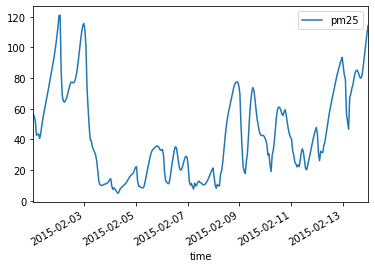

In [76]:
df_pm25[(df_pm25.lat == 39.5) & (df_pm25.lon == 116.25)].plot(x='time', y='pm25')
plt.show()